In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [13]:
df_train = pd.read_csv('train.csv')

In [14]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [18]:
mgr_options = df_train["SaleCondition"].unique()


In [19]:
mgr_options

array(['Normal', 'Abnorml', 'Partial', 'AdjLand', 'Alloca', 'Family'],
      dtype=object)

In [80]:
df_train.columns


Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [81]:
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [82]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

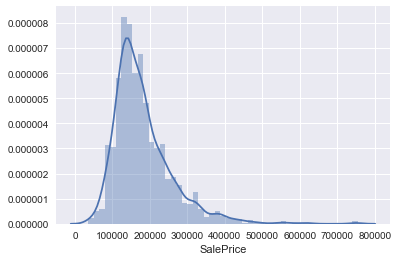

In [83]:
sns.distplot(df_train['SalePrice'])

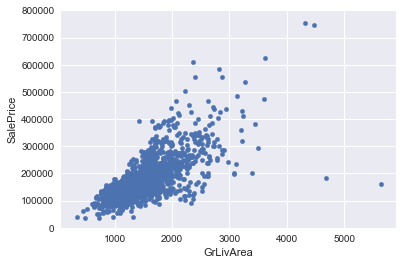

In [84]:
var = 'GrLivArea'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

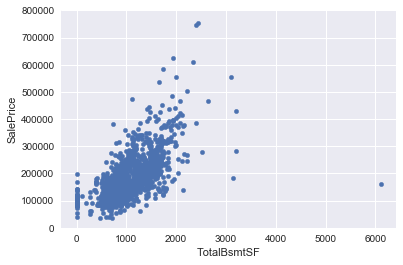

In [85]:
var1 = 'TotalBsmtSF'
data1 = pd.concat([df_train['SalePrice'], df_train[var1]], axis = 1)
data1.plot.scatter(x=var1, y='SalePrice', ylim=(0,800000) )

(-0.5, 9.5, 0.0, 800000)

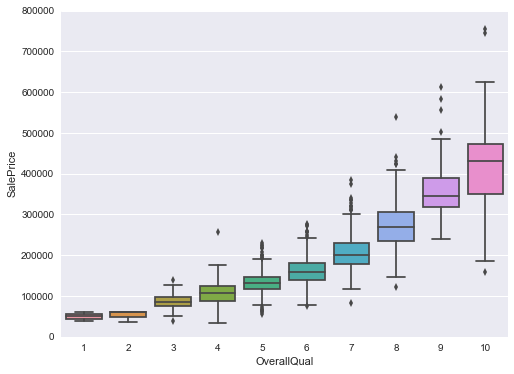

In [86]:
var = 'OverallQual'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(8,6))
fig  = sns.boxplot(x=var, y='SalePrice', data=data)
fig.axis(ymin = 0.000, ymax=800000)




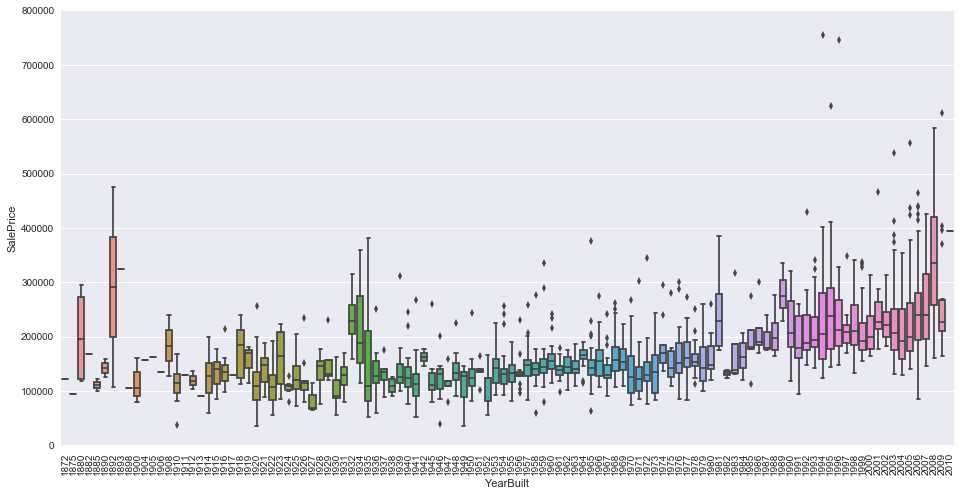

In [87]:
var = 'YearBuilt'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);

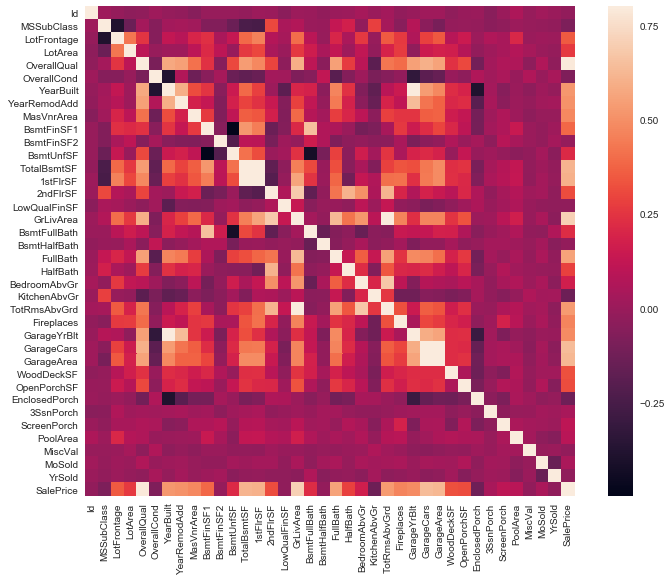

In [88]:
corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=.8, square=True);



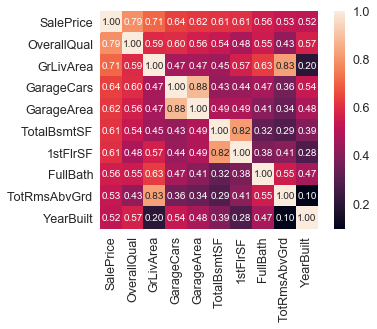

In [89]:
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

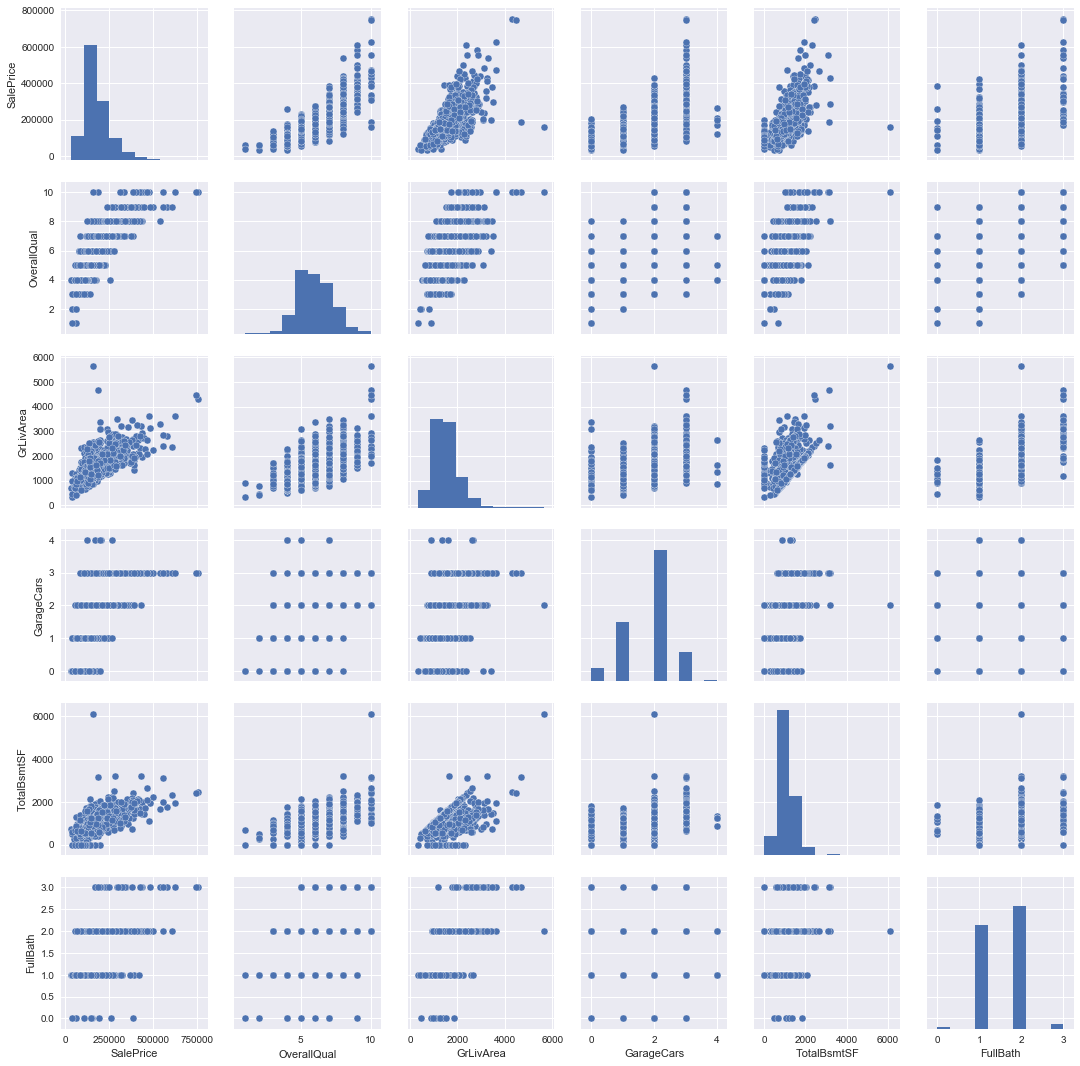

In [90]:
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath']
sns.pairplot(df_train[cols], size = 2.5)
plt.show()

In [91]:
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum() /df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total , percent], axis = 1, keys = ['Total', 'Percent'])



In [92]:
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


In [93]:
df_train = df_train.drop((missing_data[missing_data['Total'] > 1]).index,1)
df_train = df_train.drop(df_train.loc[df_train['Electrical'].isnull()].index)
df_train.isnull().sum().max()


0

In [123]:
df_train.sort_values(by = 'GrLivArea', ascending = False)[:2]
df_train = df_train.drop(df_train[df_train['Id'] == 1299].index)
df_train = df_train.drop(df_train[df_train['Id'] == 524].index)

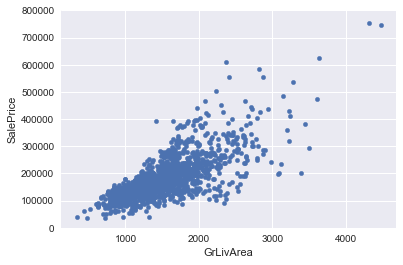

In [95]:
var = 'GrLivArea'
data = pd.concat([df_train['SalePrice'],df_train[var]] , axis = 1 )
data.plot.scatter(x=var, y = 'SalePrice', ylim = (0,800000))

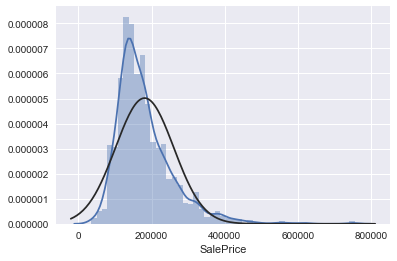

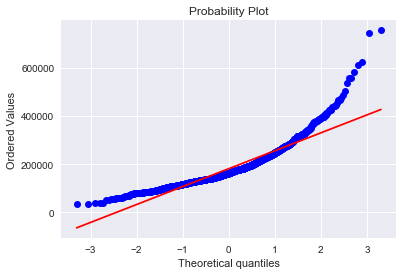

In [96]:
sns.distplot(df_train['SalePrice'], fit= norm)
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot = plt)

In [97]:
df_train['SalePrice'] = np.log(df_train['SalePrice'])


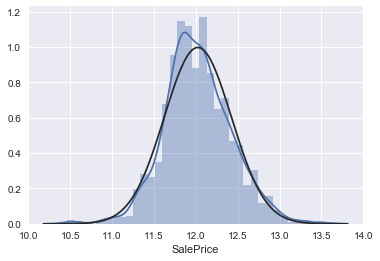

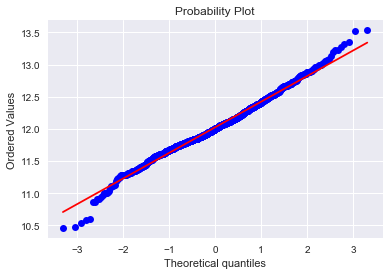

In [98]:
sns.distplot(df_train['SalePrice'], fit = norm)
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot = plt)

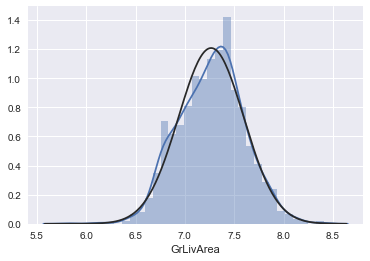

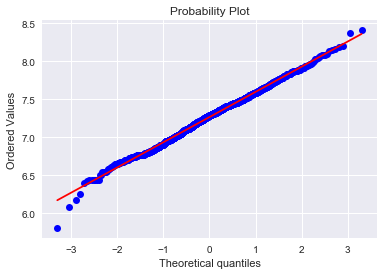

In [99]:
df_train['GrLivArea'] = np.log(df_train['GrLivArea'])
sns.distplot(df_train['GrLivArea'],fit=norm)
fig = plt.figure()
res  = stats.probplot(df_train['GrLivArea'], plot=plt)




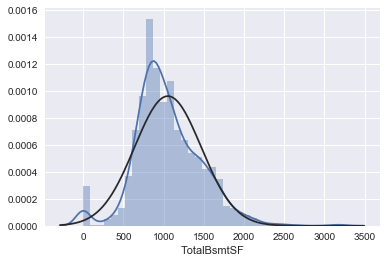

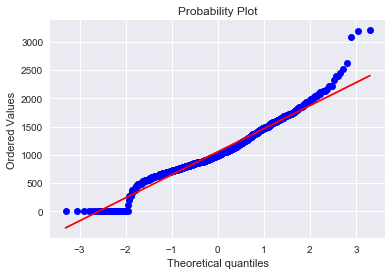

In [100]:
sns.distplot(df_train['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['TotalBsmtSF'], plot=plt)

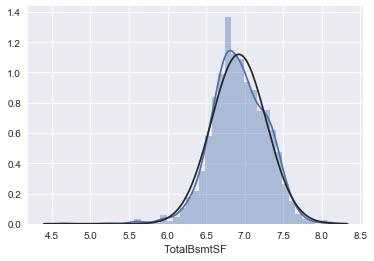

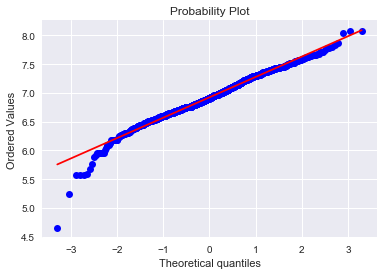

In [101]:
#create column for new variable (one is enough because it's a binary categorical feature)
#if area>0 it gets 1, for area==0 it gets 0
df_train['HasBsmt'] = pd.Series(len(df_train['TotalBsmtSF']), index=df_train.index)
df_train['HasBsmt'] = 0 
df_train.loc[df_train['TotalBsmtSF']>0,'HasBsmt'] = 1
#transform data
df_train.loc[df_train['HasBsmt']==1,'TotalBsmtSF'] = np.log(df_train['TotalBsmtSF'])
#histogram and normal probability plot
sns.distplot(df_train[df_train['TotalBsmtSF']>0]['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train[df_train['TotalBsmtSF']>0]['TotalBsmtSF'], plot=plt)

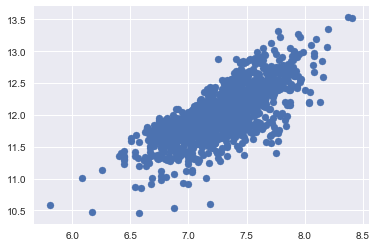

In [102]:
plt.scatter(df_train['GrLivArea'], df_train['SalePrice']);

In [103]:
df_train = pd.get_dummies(df_train)

In [107]:


# pull data into target (y) and predictors (X)
df_train_y = df_train.SalePrice
predictor_cols = ['LotArea', 'OverallQual', 'YearBuilt', 'TotRmsAbvGrd']

# Create training predictors data
df_train_x = df_train[predictor_cols]

my_model = LinearRegression()
my_model.fit(df_train_x, df_train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [108]:
test = pd.read_csv('test.csv')
# Treat the test data in the same way as training data. In this case, pull same columns.
test_X = test[predictor_cols]
# Use the model to make predictions
predicted_prices = my_model.predict(test_X)
# We will look at the predicted prices to ensure we have something sensible.
print(predicted_prices)

[11.72656782 11.96009404 11.91774459 ... 11.90249882 11.87935965
 12.39010054]


In [109]:
my_submission = pd.DataFrame({'Id': test.Id, 'SalePrice': predicted_prices})
# you could use any filename. We choose submission here
my_submission.to_csv('submission.csv', index=False)

In [121]:
from sklearn.model_selection import cross_val_score
score_ppn=cross_val_score(my_model, test_X,predicted_prices, cv=5)
score_ppn

array([0.96068493, 0.94454536, 0.95809267, 0.9345695 , 0.96477376])

In [122]:
print ("accuracy %0.2f" %(score_ppn.mean()))

accuracy 0.95


In [113]:
from sklearn.ensemble import RandomForestRegressor

In [114]:
df_train_y = df_train.SalePrice
predictor_cols = ['LotArea', 'OverallQual', 'YearBuilt', 'TotRmsAbvGrd']

# Create training predictors data
df_train_x = df_train[predictor_cols]

my_model = RandomForestRegressor()
my_model.fit(df_train_x, df_train_y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [115]:
test = pd.read_csv('test.csv')
# Treat the test data in the same way as training data. In this case, pull same columns.
test_X = test[predictor_cols]
# Use the model to make predictions
predicted_prices = my_model.predict(test_X)
# We will look at the predicted prices to ensure we have something sensible.
print(predicted_prices)

[11.81596408 12.07330966 11.93925835 ... 11.9430376  11.93359634
 12.45206837]


In [116]:
my_submission = pd.DataFrame({'Id': test.Id, 'SalePrice': predicted_prices})
# you could use any filename. We choose submission here
my_submission.to_csv('submission1.csv', index=False)

In [119]:
from sklearn.model_selection import cross_val_score
score_ppn=cross_val_score(my_model, test_X,predicted_prices, cv=5)
score_ppn

array([0.96567409, 0.94924615, 0.95582656, 0.94308285, 0.96498373])

In [120]:
print ("accuracy %0.2f" %(score_ppn.mean()))

accuracy 0.96


In [10]:
import Sqlite

ModuleNotFoundError: No module named 'Sqlite'